# Travel package 

# **Context:**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.Eyye


# **Objective:**

- To predict which customer is more likely to purchase the newly introduced travel package.

# **Data Description:**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

CustomerID: Unique customer ID

ProdTaken: Product taken flag

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisited: Total number of person came with customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of the trip in a year by customer

Passport: The customer has passport or not

OwnCar: Customers owns a car flag

NumberOfChildrenVisited: Total number of children visit with customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer



## Index

- <a href = #link1>Overview of the dataset </a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split the dataset</a>


- <a href = #link4>Decision Tree Model </a> 


- <a href = #link5>Random Forest Model</a>


- <a href = #link6>Boosting Models</a>


- <a href = #link7>Stacking Model</a>


- <a href = #link8>Business Recommendations</a>

## <a id = "link1"></a> Overview of the dataset 

**Let's start by importing libraries we need.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from time import time

In [2]:
#Loading dataset
df=pd.read_csv("Tourism.csv")
data=df.copy()

**View the first 5 rows of the dataset.**

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Check data types and number of non-null values for each column.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- Dataset has 20 columns and 4888 number of rows. Lets review the data to check if they are categorical and if there are missing values

In [5]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- Although some variables have missing values, we will do mean imputation,  instead of dropping them 

In [7]:
data["Age"] = data["Age"].fillna(value=data["Age"].mode())
data["DurationOfPitch"] = data["DurationOfPitch"].fillna(value=data["DurationOfPitch"].mode())
data["NumberOfTrips"] = data["NumberOfTrips"].fillna(value=data["NumberOfTrips"].mode())
data["MonthlyIncome"] = data["MonthlyIncome"].fillna(value=data["MonthlyIncome"].mode())            
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Number of unique values in each column**

In [8]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- Most of the features are categorical. Lets review them further

In [9]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','ProductPitched','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
0    3466
1    1422
Name

**Summary of the dataset**

In [10]:
# Review some categorical columns statistics
cont_cols = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting', 'MonthlyIncome']
data[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


Observations 
- Largest demographoc is 30-45 years old
- Many cutomers dont have Passports. Offer passport making services for customers by partnering up with Passport agencies 
- There are many subpar PitchSatisfactionScore. Reviews reassons for getting low scores
- Duration of pitch is 15 minutes on an average. Pitches could be improved and targetted.
- Largest demographic is couples and families.
- Gender has a typo


In [11]:
#Fix typo in Gender
data['Gender'] = data['Gender'].replace('Fe Male','Female')
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [12]:
#Dropping CustomerID from the dataframe, as it doesnt add value to modelling
data.drop(columns=['CustomerID'], inplace=True)

In [13]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## <a id = "link2"></a> EDA

### Univariate analysis

In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

**Observations on temperature**

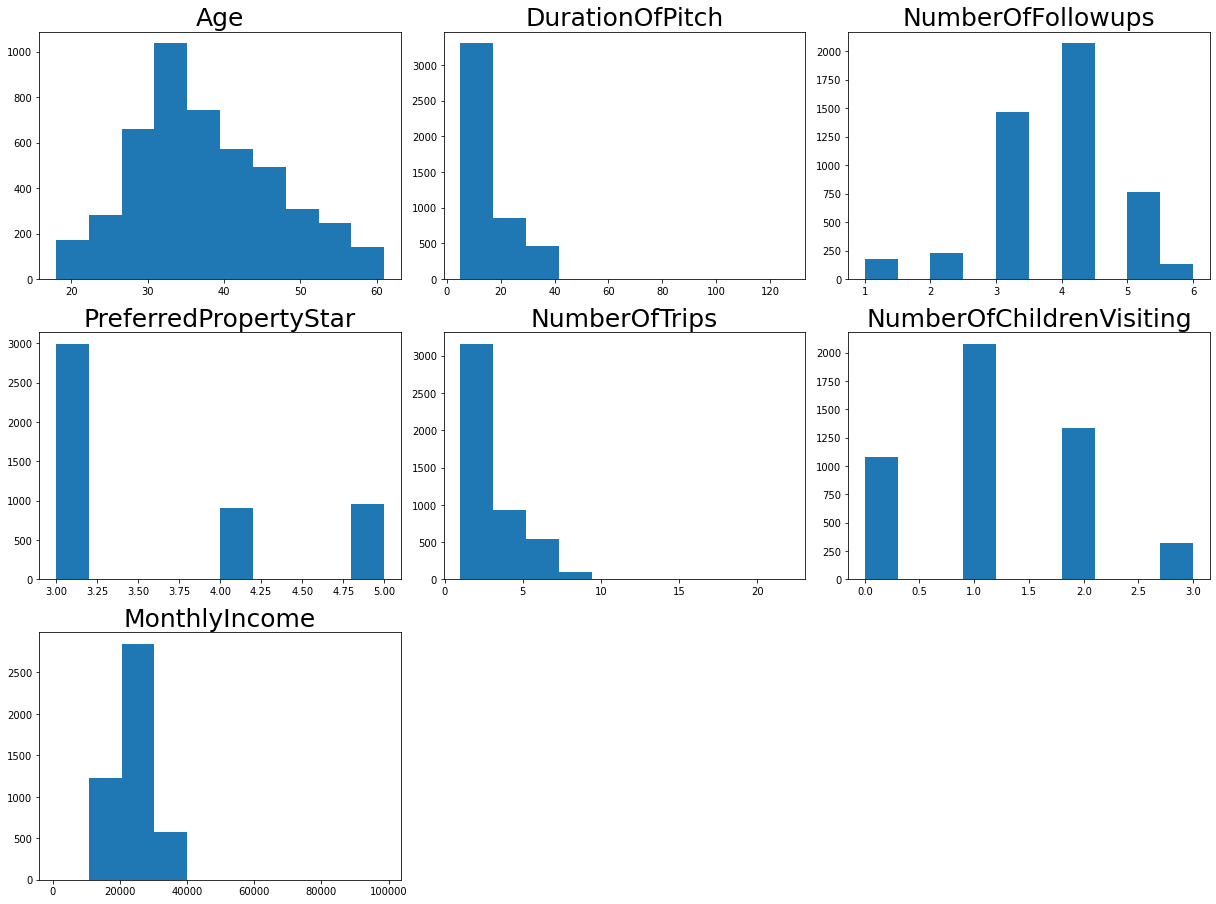

In [15]:
# lets plot histogram of all plots
from scipy.stats import norm
plt.figure(figsize=(17,75))


for i in range(len(cont_cols)):
    plt.subplot(18,3,i+1)
    plt.hist(data[cont_cols[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(cont_cols[i],fontsize=25)
    
plt.show()

<Figure size 1440x2160 with 0 Axes>

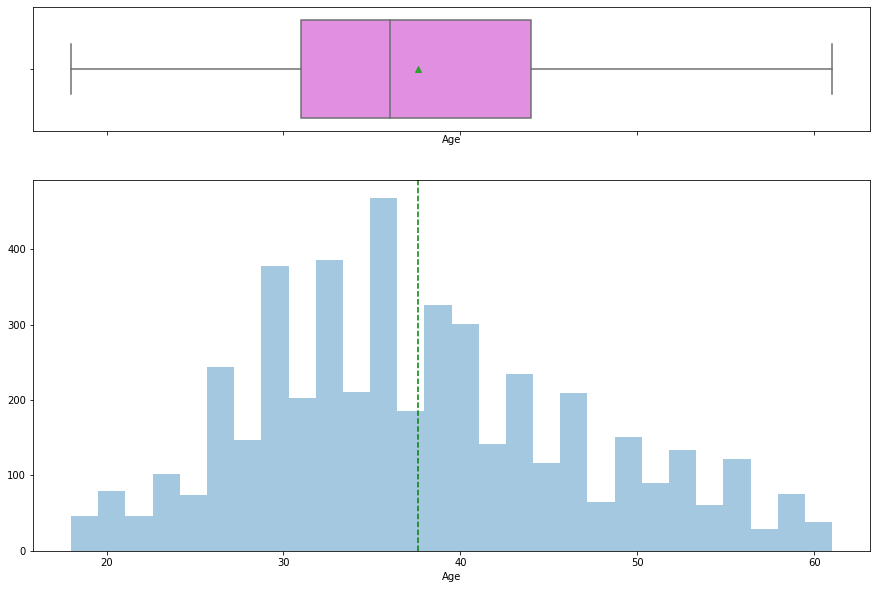

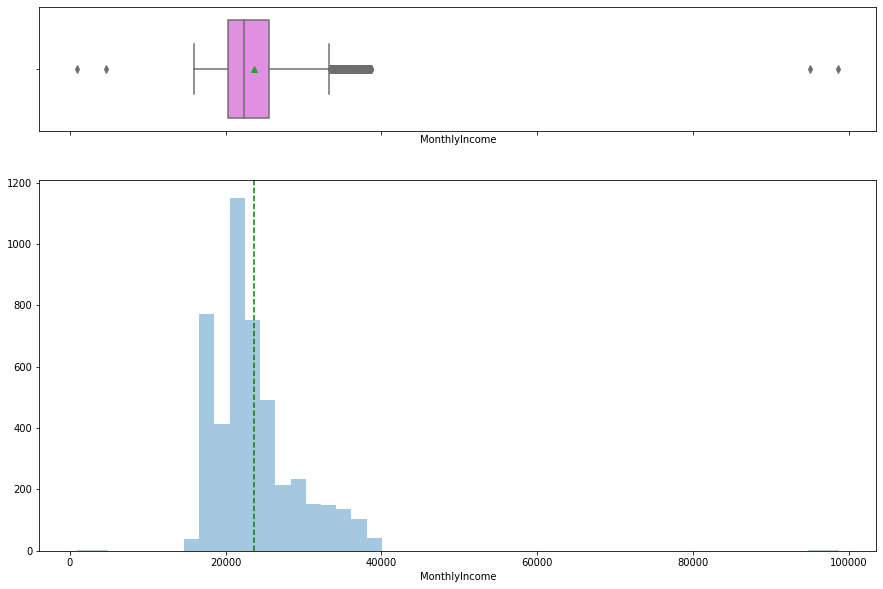

In [16]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

histogram_boxplot(data["Age"])
histogram_boxplot(data["MonthlyIncome"])


- Age is normally distributed. MonthlyIncome are righthly skewed.
- There are some outliers but we will leave them untreated.

**Function to create barplots that indicate percentage for each category**

In [17]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

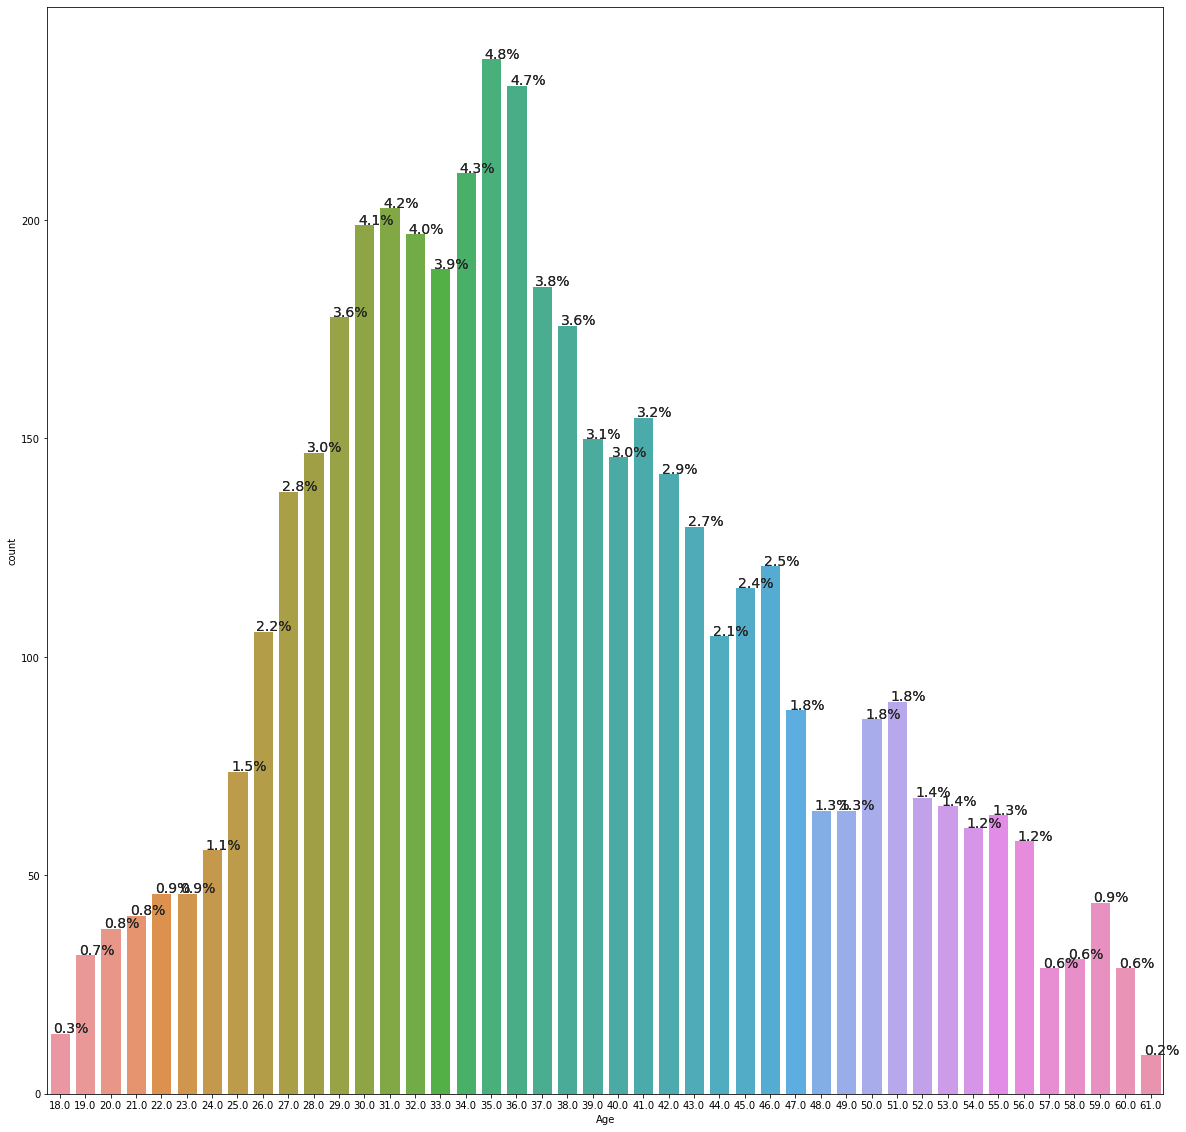

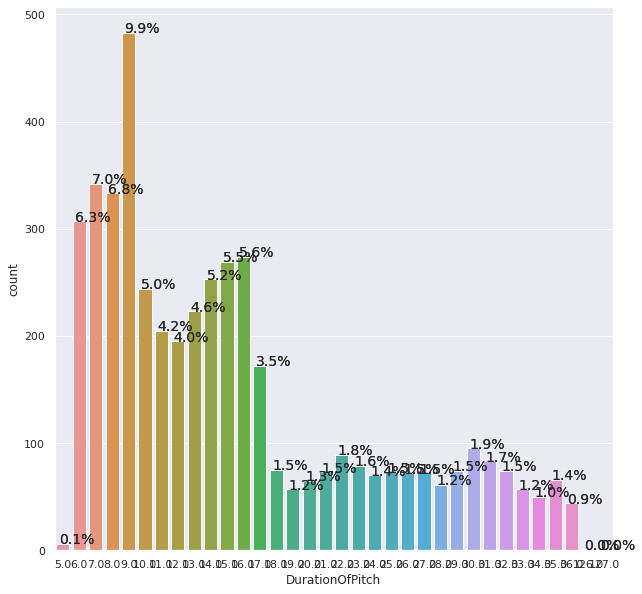

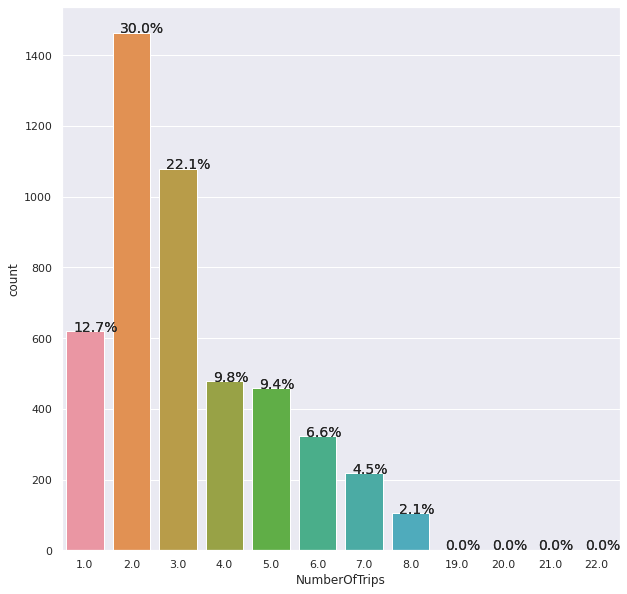

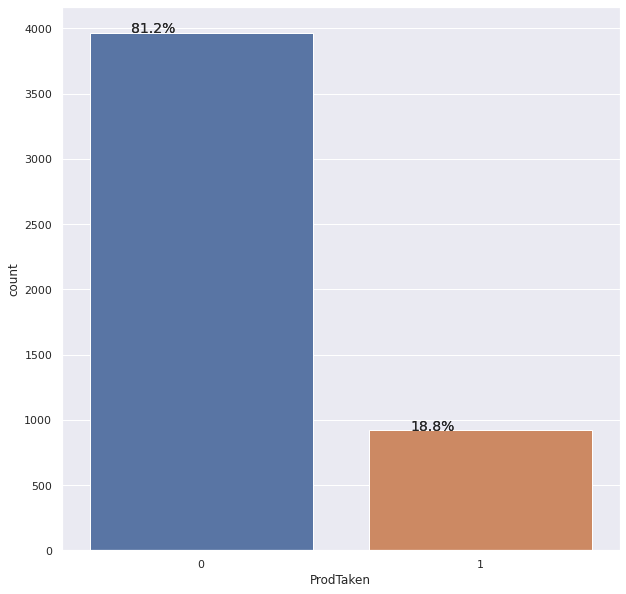

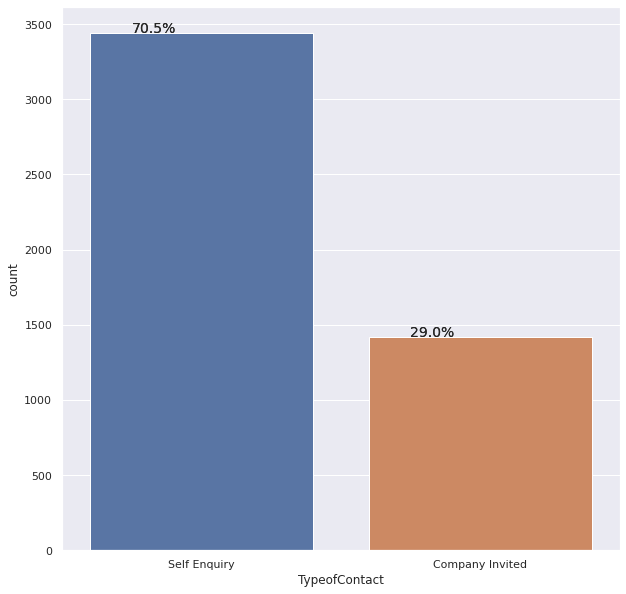

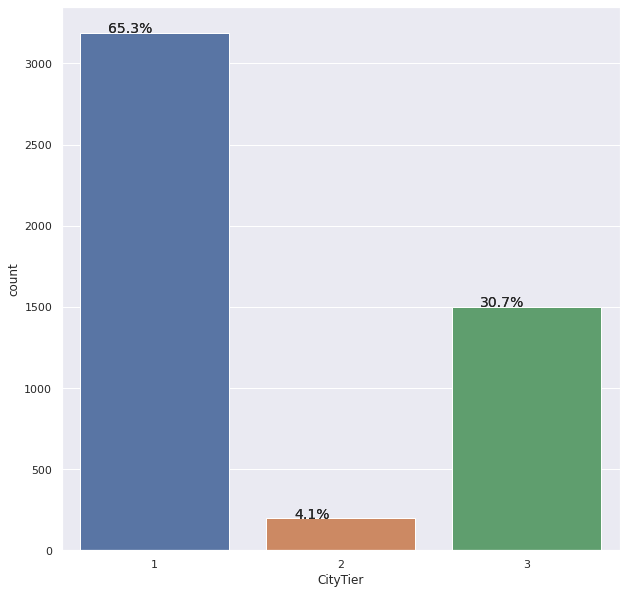

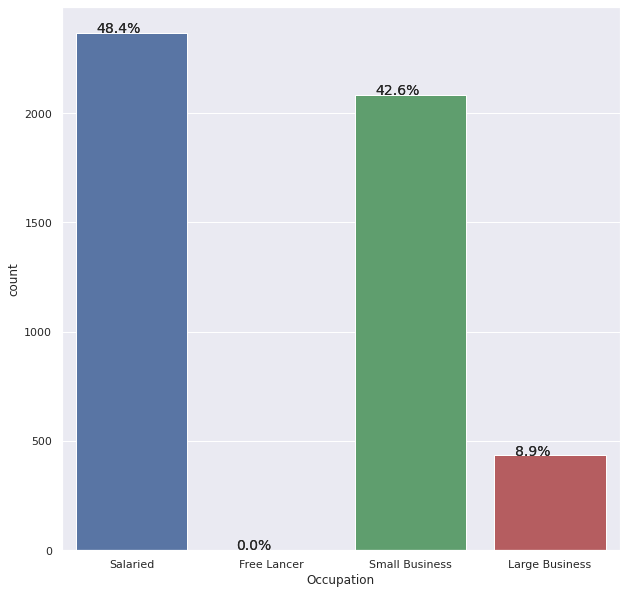

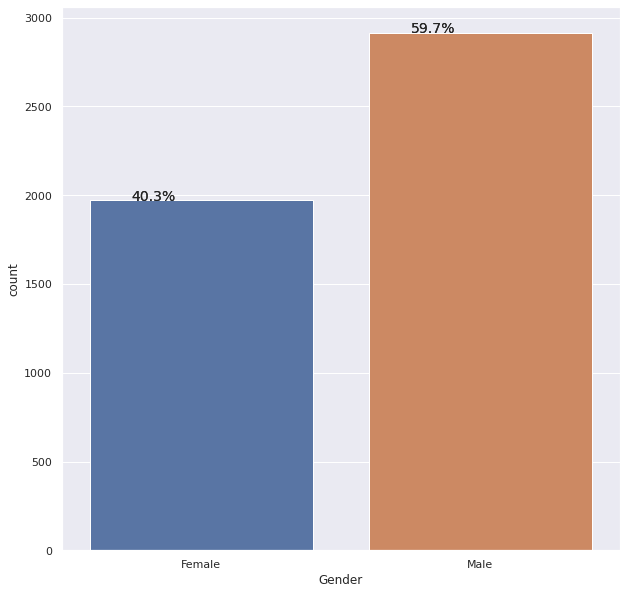

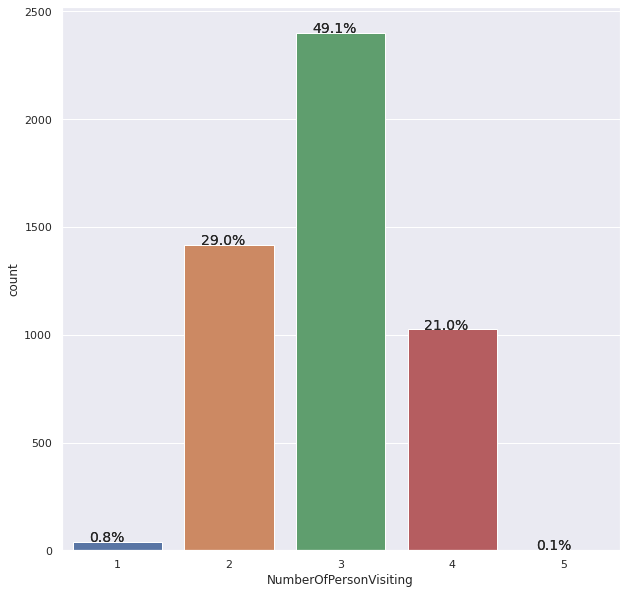

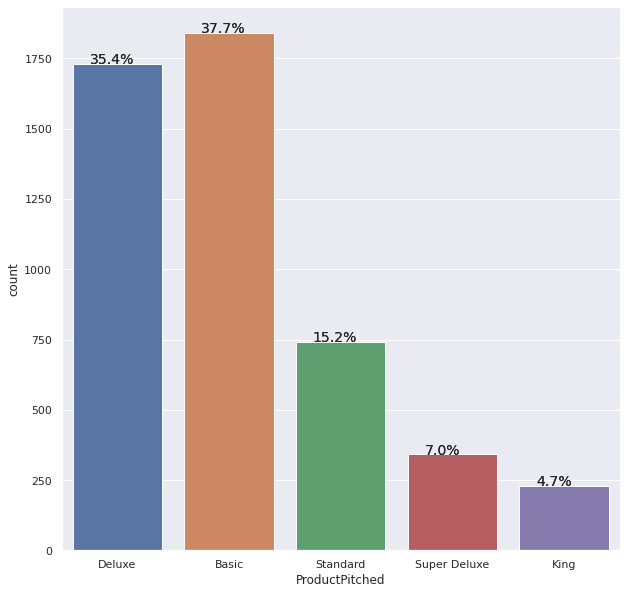

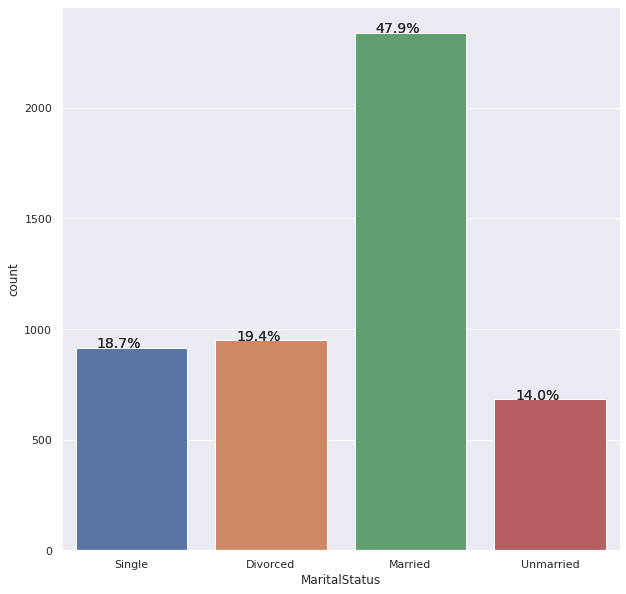

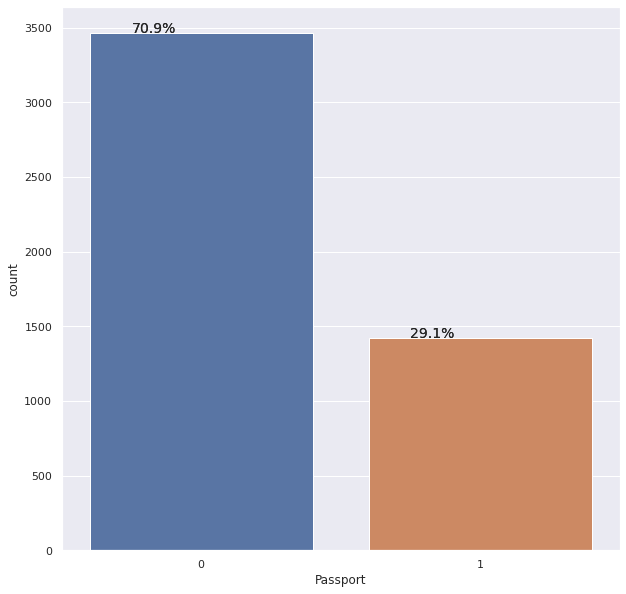

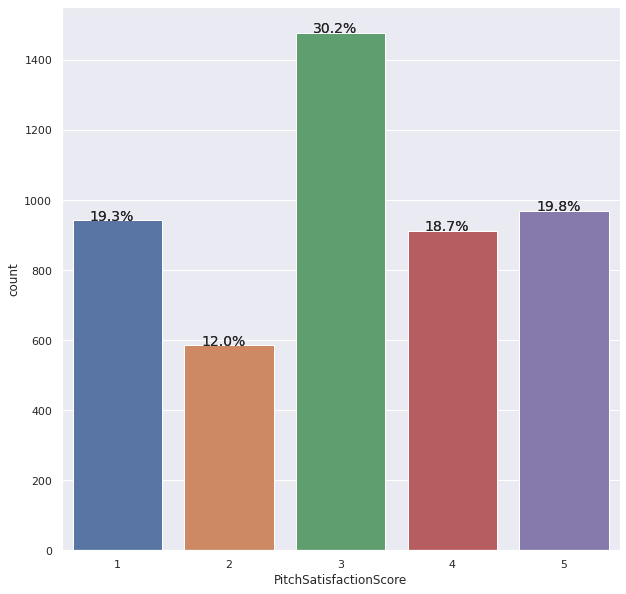

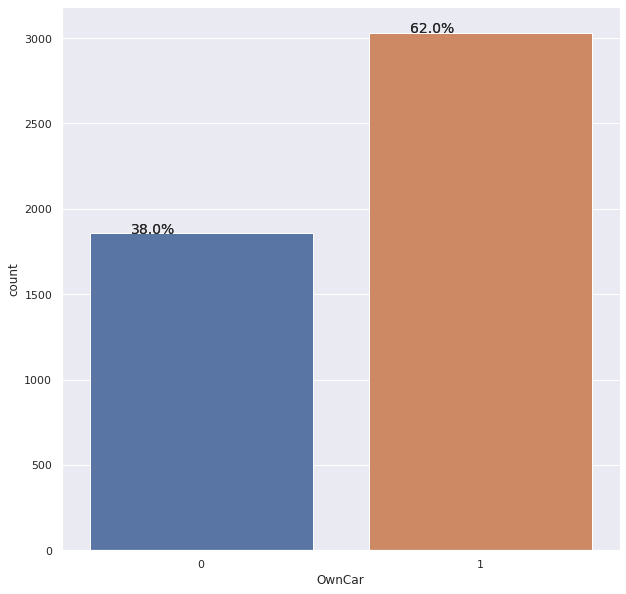

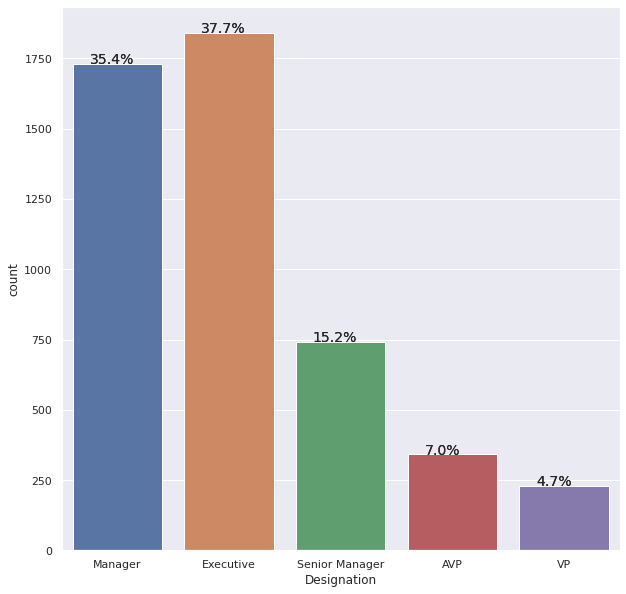

<Figure size 720x720 with 0 Axes>

In [18]:
plt.figure(figsize=(20,20))
select_columns = ['Age', 'DurationOfPitch', 'NumberOfTrips'] + cat_cols

for i, variable in enumerate(select_columns):
                     ax = sns.countplot(data[select_columns[i]])
                     perc_on_bar(data[select_columns[i]]) 
                     plt.figure(figsize=(10,10))

plt.show()

- Self Inquiry is much higher than Company Invited. Needs to be investigated for better marketing strategy
- Couples and families are large demographic
- Deluxe and Basic packages are popular packages.

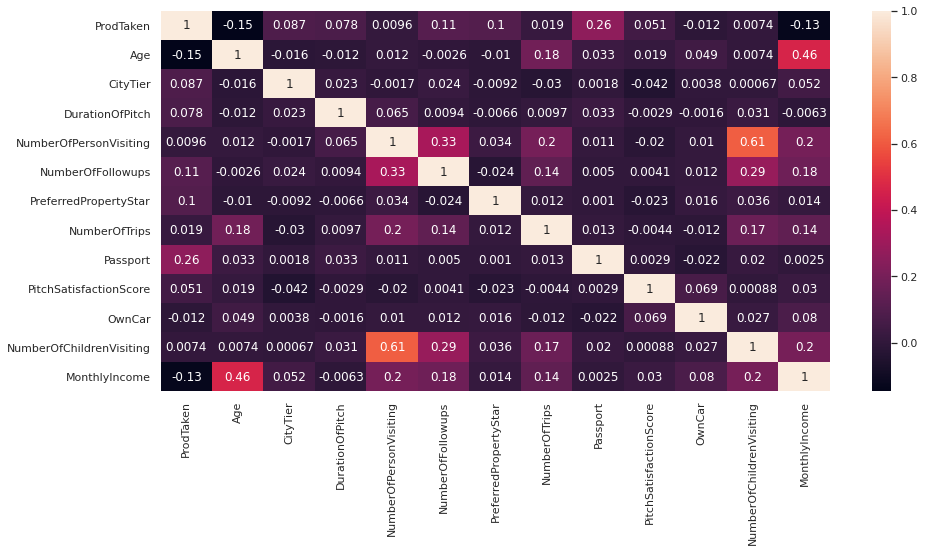

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

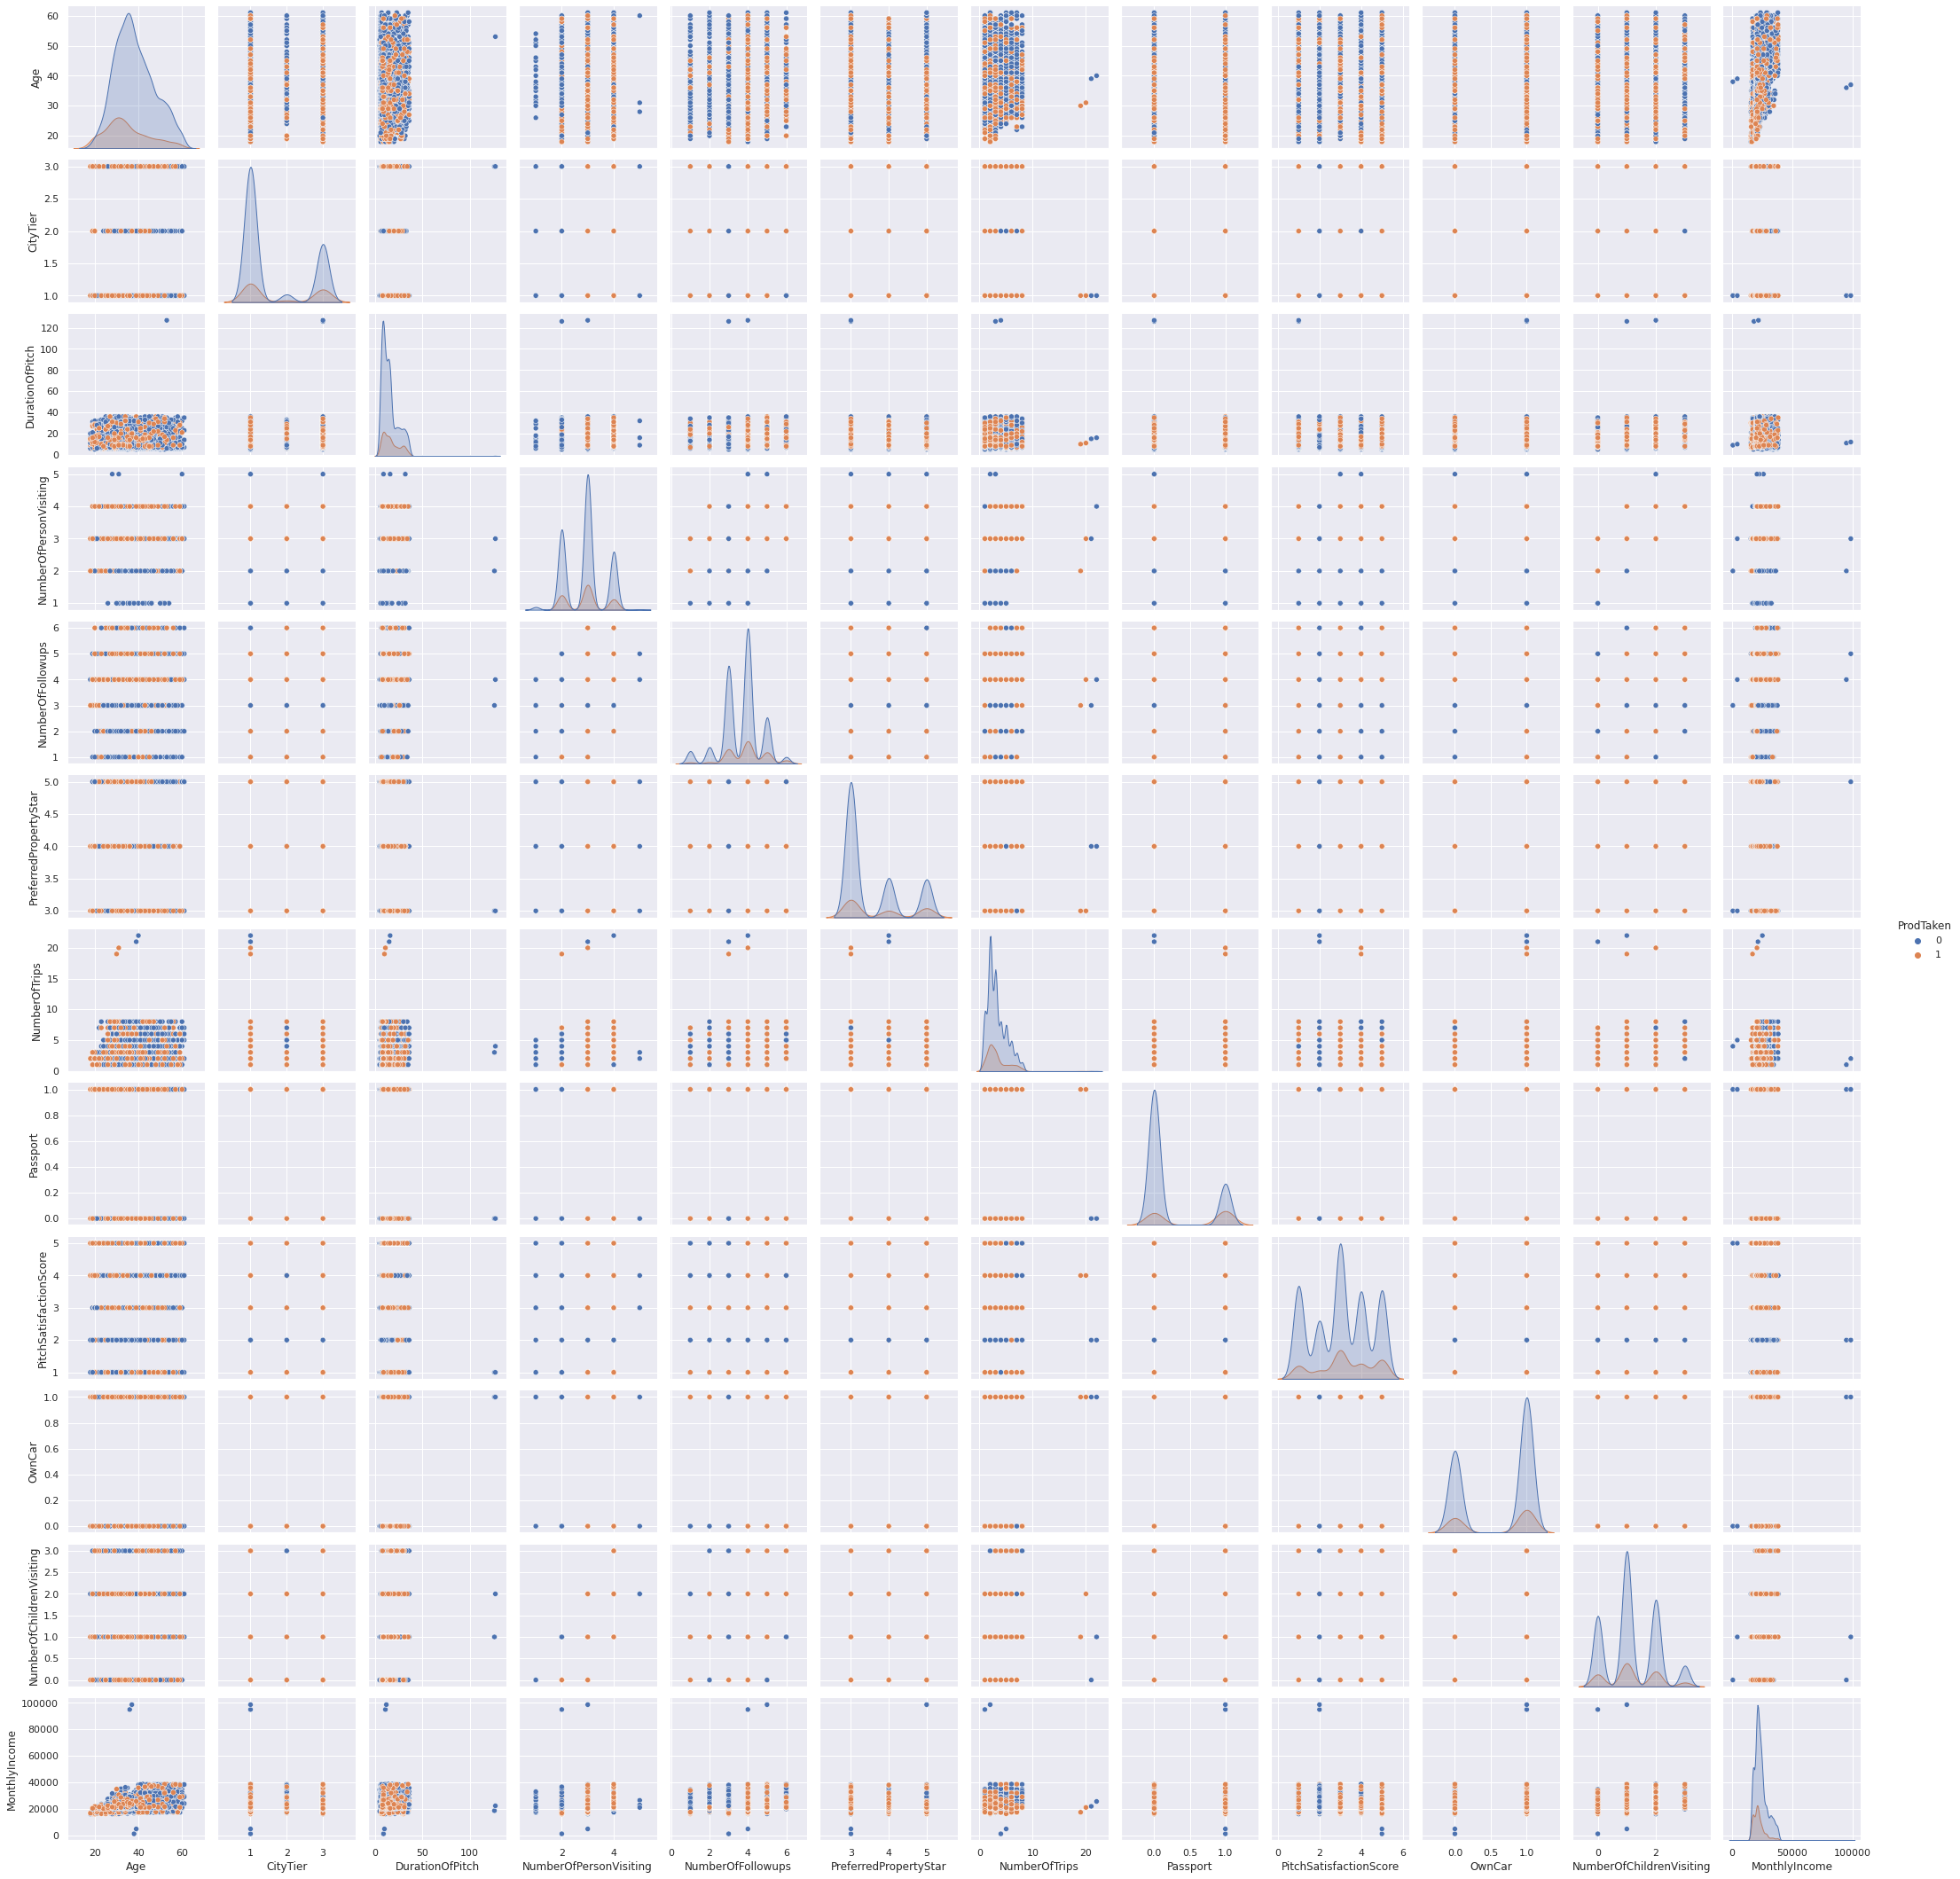

In [20]:
#Lets see these correlations on pairplot
sns.pairplot(data=data,hue="ProdTaken")
plt.show()

### Bivariate analysis

- No strong correlations between features. We will keep all features for modelling.
- Age and MonthlyIncome are linearly related, as expected.
- Most of the features are categorical - We'll one-hot encode these features before modelling. 


### Data Pre-processing

In [21]:
#dummy_cols = ['']

dummy = pd.get_dummies(data['TypeofContact'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('TypeofContact', axis=1)

dummy = pd.get_dummies(data['Occupation'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('Occupation', axis=1)

dummy = pd.get_dummies(data['Gender'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('Gender', axis=1)

dummy = pd.get_dummies(data['ProductPitched'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('ProductPitched', axis=1)

dummy = pd.get_dummies(data['MaritalStatus'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('MaritalStatus', axis=1)

dummy = pd.get_dummies(data['Designation'], drop_first=True)
data = pd.concat([data, dummy], axis=1).drop('Designation', axis=1)


In [22]:
# Some features have a few null data points. We will remove them prior to modelling.
data.dropna(axis=0,inplace=True)

In [23]:
data.isna().sum()

ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
Self Enquiry                0
Large Business              0
Salaried                    0
Small Business              0
Male                        0
Deluxe                      0
King                        0
Standard                    0
Super Deluxe                0
Married                     0
Single                      0
Unmarried                   0
Executive                   0
Manager                     0
Senior Manager              0
VP                          0
dtype: int64

In [24]:
data['ProdTaken'].value_counts(normalize=True)

0    0.806928
1    0.193072
Name: ProdTaken, dtype: float64

- Data is imbalanced with only 19% for positive class . We will stratify during the Test-Train split to preserve the proportion of target as in the original dataset.

## <a id = "link3"></a> Split the dataset

In [25]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [26]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [27]:
X_train.shape, X_test.shape

((2889, 28), (1239, 28))

In [28]:
y_train.value_counts(1)

0    0.806854
1    0.193146
Name: ProdTaken, dtype: float64

We only have 19% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

## Building Models

In [29]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #train_r2=metrics.r2_score(y_train,pred_train)
    #test_r2=metrics.r2_score(y_test,pred_test)
    #train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    #test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy=accuracy_score(y_test,pred_test)

    train_recall=recall_score(y_train,pred_train)
    test_recall=recall_score(y_test,pred_test)

    train_precision=precision_score(y_train,pred_train)
    test_precision=precision_score(y_test,pred_test)

    train_f1=f1_score(y_train,pred_train)
    test_f1=f1_score(y_test,pred_test)
    
    #Adding all scores in the list
    score_list.extend((train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print('Accuracy on train data:',train_accuracy)
        print('Accuracy on test data:',test_accuracy)

        print('Recall on train data:',train_recall)
        print('Recall on test data:',test_recall)

        print('Precision on train data:',train_precision)
        print('Precision on test data:',test_precision)

        print('f1 score on train data:',train_f1)
        print('f1 score on test data:',test_f1)
    
    # returning the list with train and test scores
    return score_list

## <a id = "link4"></a>Decision Tree Model

In [30]:
%%time 
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.20,1:0.80},random_state=1)
dtree.fit(X_train,y_train)

CPU times: user 17.4 ms, sys: 983 µs, total: 18.4 ms
Wall time: 26.4 ms


In [31]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

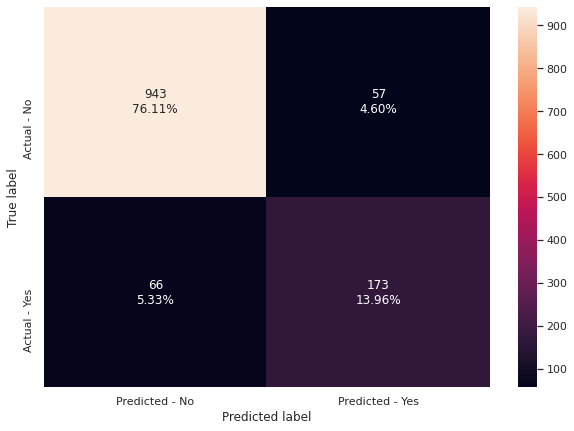

In [32]:
make_confusion_matrix(dtree,y_test)

In [33]:
y_train.value_counts(1)

0    0.806854
1    0.193146
Name: ProdTaken, dtype: float64

#Insights:
- **True Positives:**
    - Reality: A customer signs up for travel package
    - Model predicted: The customer will sign up for travel package
    - Outcome: The model is good. We targeted well. 

- **True Negatives:**
    - Reality: A liablity customer does NOT sign up for travel package
    - Model predicted: A liablity customer will NOT sign up for travel package
    - Outcome: The business is unaffected, as no extra expense to business

- **False Positives:**
    - Reality:  A liablity does NOT sign up for travel package
    - Model predicted: The customer will sign up for travel package
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A liablity does NOT sign up for travel package
    - Model predicted: The customer would have signed up for travel package
    - Outcome: The potential customer is missed by the sales/marketing team. (Customer retention will get affected.)



- In this case, not being able to identify a potential customer for travel package is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [34]:
dtree_score=get_model_score(dtree)

Accuracy on train data: 1.0
Accuracy on test data: 0.9007263922518159
Recall on train data: 1.0
Recall on test data: 0.7238493723849372
Precision on train data: 1.0
Precision on test data: 0.7521739130434782
f1 score on train data: 1.0
f1 score on test data: 0.7377398720682303


- Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [35]:
%%time
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=None,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 203 ms, total: 1min 8s
Wall time: 1min 8s


In [36]:
dtree_tuned_score=get_model_score(dtree_tuned)

Accuracy on train data: 0.9785392869505019
Accuracy on test data: 0.8870056497175142
Recall on train data: 0.8942652329749103
Recall on test data: 0.6485355648535565
Precision on train data: 0.9940239043824701
Precision on test data: 0.7345971563981043
f1 score on train data: 0.9415094339622642
f1 score on test data: 0.6888888888888889


**Plotting the feature importance of each variable**

In [37]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Age                       0.146623
DurationOfPitch           0.122774
MonthlyIncome             0.108522
Executive                 0.090180
Passport                  0.085139
NumberOfTrips             0.078161
PitchSatisfactionScore    0.068427
CityTier                  0.053212
NumberOfFollowups         0.035880
PreferredPropertyStar     0.035359
Self Enquiry              0.023848
Single                    0.022944
Married                   0.017990
Unmarried                 0.015630
NumberOfChildrenVisiting  0.015478
Large Business            0.014969
Salaried                  0.014369
Male                      0.012879
OwnCar                    0.006496
NumberOfPersonVisiting    0.006234
Small Business            0.005007
Manager                   0.004816
Standard                  0.004309
Senior Manager            0.004232
King                      0.002829
Super Deluxe              0.002437
Deluxe                    0.001257
VP                  

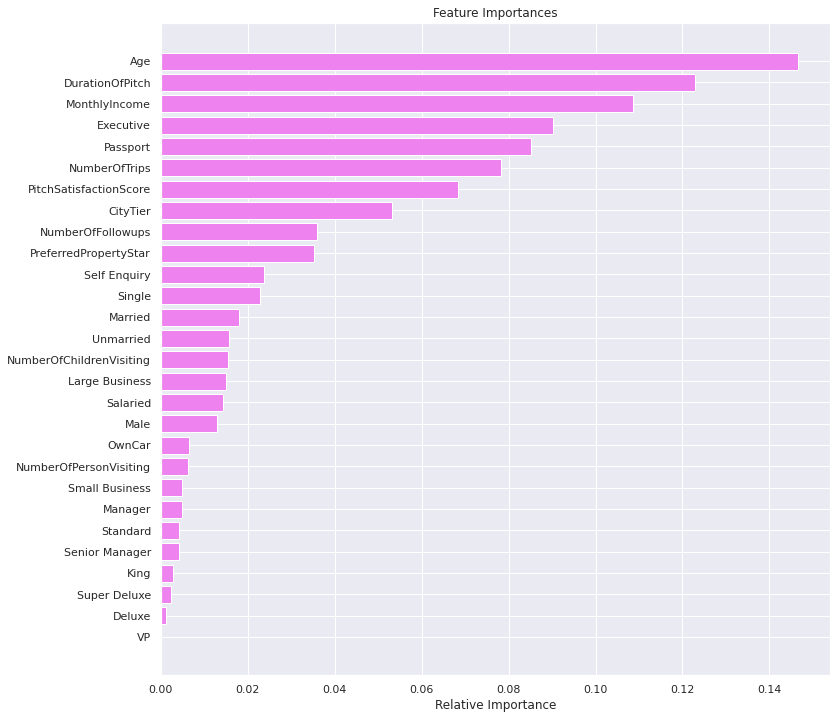

In [38]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, in addition to DurationofPitch and MonthlyIncome, for tuned decision tree model

## <a id = "link5"></a>Random Forest Model

In [39]:
%%time
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

CPU times: user 317 ms, sys: 844 µs, total: 317 ms
Wall time: 317 ms


In [40]:
rf_estimator_score=get_model_score(rf_estimator)

Accuracy on train data: 1.0
Accuracy on test data: 0.9136400322841001
Recall on train data: 1.0
Recall on test data: 0.6150627615062761
Precision on train data: 1.0
Precision on test data: 0.9074074074074074
f1 score on train data: 1.0
f1 score on test data: 0.7331670822942643


- Random forest is giving poor recall score on Test data but overfitting on train data. Same performance on F1 metric too.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [41]:
%%time
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=None,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

CPU times: user 2min 12s, sys: 312 ms, total: 2min 13s
Wall time: 2min 13s


In [42]:
rf_tuned_score=get_model_score(rf_tuned)

Accuracy on train data: 1.0
Accuracy on test data: 0.9225181598062954
Recall on train data: 1.0
Recall on test data: 0.7071129707112971
Precision on train data: 1.0
Precision on test data: 0.8666666666666667
f1 score on train data: 1.0
f1 score on test data: 0.7788018433179724


- Recall and F1 scores have improved slightly after the hyperparameter tuning.

In [43]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Age                       0.141633
DurationOfPitch           0.124827
MonthlyIncome             0.122678
Executive                 0.078460
Passport                  0.076011
NumberOfTrips             0.056098
PitchSatisfactionScore    0.054520
CityTier                  0.047726
NumberOfFollowups         0.046719
PreferredPropertyStar     0.034697
Single                    0.023088
Unmarried                 0.022504
NumberOfChildrenVisiting  0.021895
Male                      0.019832
Self Enquiry              0.019351
Large Business            0.019147
NumberOfPersonVisiting    0.019073
Married                   0.016018
Small Business            0.012238
OwnCar                    0.010223
Salaried                  0.010160
Standard                  0.005333
Manager                   0.005098
Deluxe                    0.004433
Senior Manager            0.004424
Super Deluxe              0.002213
King                      0.001026
VP                  

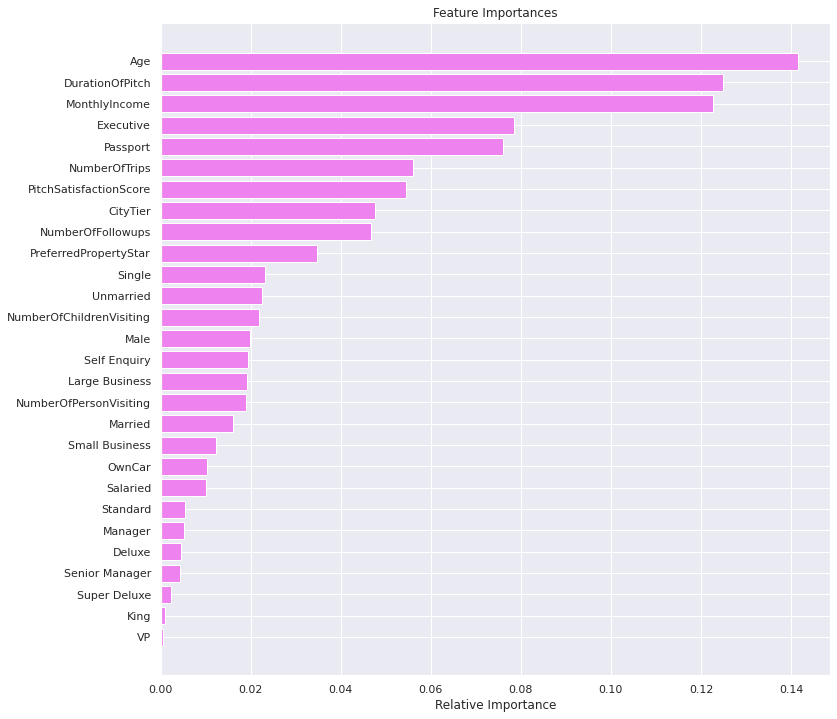

In [44]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Although the top 5 features are the same as Decision Tree, there is proportionality more importnace given to MonthlyIncome in RF model

## <a id = "link6"></a>Boosting Models

### AdaBoost Classifier

In [45]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [46]:
ab_classifier_score=get_model_score(ab_classifier)

Accuracy on train data: 0.8497750086535133
Accuracy on test data: 0.8224374495560937
Recall on train data: 0.3942652329749104
Recall on test data: 0.3179916317991632
Precision on train data: 0.6962025316455697
Precision on test data: 0.5714285714285714
f1 score on train data: 0.5034324942791762
f1 score on test data: 0.40860215053763443


- AdaBoost is performing particularly poorly for recall and F1 metric. Lets tune  next

### Hyperparameter Tuning

In [47]:
%%time
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=None,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

CPU times: user 27 s, sys: 64.7 ms, total: 27 s
Wall time: 27 s


In [48]:
ab_tuned_score=get_model_score(ab_tuned)

Accuracy on train data: 0.8584285219799238
Accuracy on test data: 0.8288942695722357
Recall on train data: 0.3727598566308244
Recall on test data: 0.2803347280334728
Precision on train data: 0.7790262172284644
Precision on test data: 0.6261682242990654
f1 score on train data: 0.5042424242424243
f1 score on test data: 0.3872832369942196


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [49]:
## importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Age                       0.1500
MonthlyIncome             0.1500
Passport                  0.0750
DurationOfPitch           0.0750
NumberOfFollowups         0.0750
CityTier                  0.0625
Single                    0.0500
PitchSatisfactionScore    0.0500
NumberOfTrips             0.0500
PreferredPropertyStar     0.0500
Manager                   0.0375
Unmarried                 0.0375
Executive                 0.0250
Self Enquiry              0.0250
Male                      0.0250
Super Deluxe              0.0125
Senior Manager            0.0125
VP                        0.0125
Large Business            0.0125
NumberOfPersonVisiting    0.0125
King                      0.0000
Standard                  0.0000
Deluxe                    0.0000
Married                   0.0000
Small Business            0.0000
NumberOfChildrenVisiting  0.0000
OwnCar                    0.0000
Salaried                  0.0000


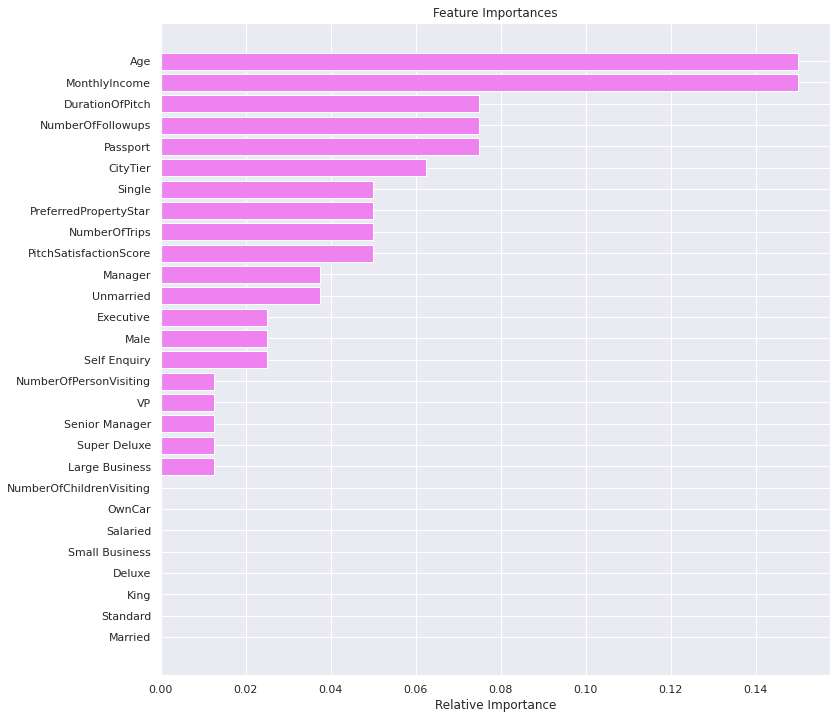

In [50]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In the top 5 features in adaboost, number of followups are deemed more important than executive postion of customer.

### Gradient Boosting Classifier

In [51]:
%%time
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

CPU times: user 435 ms, sys: 962 µs, total: 436 ms
Wall time: 434 ms


In [52]:
gb_estimator_score=get_model_score(gb_estimator)

Accuracy on train data: 0.9016960886119765
Accuracy on test data: 0.8587570621468926
Recall on train data: 0.5609318996415771
Recall on test data: 0.4225941422594142
Precision on train data: 0.8892045454545454
Precision on test data: 0.7318840579710145
f1 score on train data: 0.6879120879120879
f1 score on test data: 0.5358090185676392


- We will use Google's Hardware accelerator (GPU) on Google Colab to run these models as local RAM wasnt able to keep up with the intesive computation. 
- For GradientBoosting model too, Recall and F1 metric is performing poorly

### Hyperparameter Tuning

In [54]:
%%time
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=None,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

CPU times: user 22min 58s, sys: 1.74 s, total: 23min
Wall time: 22min 57s


In [55]:
gb_tuned_score=get_model_score(gb_tuned)

Accuracy on train data: 1.0
Accuracy on test data: 0.9297820823244553
Recall on train data: 1.0
Recall on test data: 0.7238493723849372
Precision on train data: 1.0
Precision on test data: 0.8917525773195877
f1 score on train data: 1.0
f1 score on test data: 0.7990762124711316


- For tuned GBmodel, Recall and F1 metric  are performing as well as the Decision Tree and Random Forest models.

In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
MonthlyIncome             0.155096
Age                       0.151884
DurationOfPitch           0.122521
Passport                  0.076462
Executive                 0.061011
PitchSatisfactionScore    0.052241
NumberOfFollowups         0.048448
NumberOfTrips             0.047504
CityTier                  0.045359
PreferredPropertyStar     0.032607
Single                    0.025739
Self Enquiry              0.019846
Unmarried                 0.019639
Male                      0.017973
NumberOfPersonVisiting    0.017400
Married                   0.017032
Large Business            0.016083
NumberOfChildrenVisiting  0.015278
Small Business            0.010828
OwnCar                    0.009179
Salaried                  0.008246
Standard                  0.007234
Manager                   0.007070
Senior Manager            0.006619
Deluxe                    0.006075
Super Deluxe              0.001808
VP                        0.000603
King                

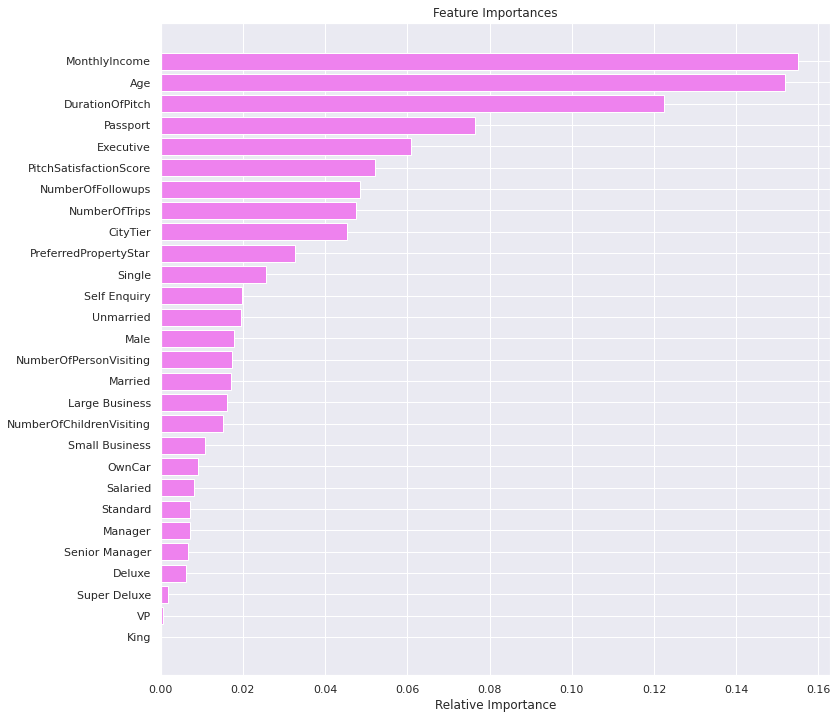

In [57]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Although the top5 features here are the same as teh Decision tree and Random Forest classifiers, Monthly Income is higher importance than Age.

### XGBoost Classifier

In [58]:
%%time
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

CPU times: user 264 ms, sys: 106 ms, total: 370 ms
Wall time: 373 ms


In [59]:
xgb_estimator_score=get_model_score(xgb_estimator)

Accuracy on train data: 0.8958116995500173
Accuracy on test data: 0.8579499596448749
Recall on train data: 0.5304659498207885
Recall on test data: 0.4100418410041841
Precision on train data: 0.8835820895522388
Precision on test data: 0.7368421052631579
f1 score on train data: 0.6629339305711087
f1 score on test data: 0.5268817204301075


- XGBoost with default parameters is perfoming badly for Recall metric

### Hyperparameter Tuning

In [60]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=None,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

CPU times: user 14min 50s, sys: 8.25 s, total: 14min 59s
Wall time: 14min 56s


In [61]:
xgb_tuned_score=get_model_score(xgb_tuned)

Accuracy on train data: 0.9093111803392178
Accuracy on test data: 0.8684422921711057
Recall on train data: 0.5931899641577061
Recall on test data: 0.4435146443514644
Precision on train data: 0.9043715846994536
Precision on test data: 0.7794117647058824
f1 score on train data: 0.7164502164502164
f1 score on test data: 0.5653333333333332


In [62]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport                  0.103856
Executive                 0.096952
Single                    0.066790
Unmarried                 0.049976
Large Business            0.049050
CityTier                  0.048331
Deluxe                    0.045748
NumberOfFollowups         0.040807
PreferredPropertyStar     0.035738
Age                       0.034999
MonthlyIncome             0.032500
Male                      0.032115
PitchSatisfactionScore    0.031197
DurationOfPitch           0.030711
Standard                  0.029667
Married                   0.028693
NumberOfTrips             0.028267
Manager                   0.027937
Salaried                  0.027721
Small Business            0.025987
Senior Manager            0.024322
NumberOfPersonVisiting    0.022994
Super Deluxe              0.021680
Self Enquiry              0.020299
NumberOfChildrenVisiting  0.019080
OwnCar                    0.017591
King                      0.006995
VP                  

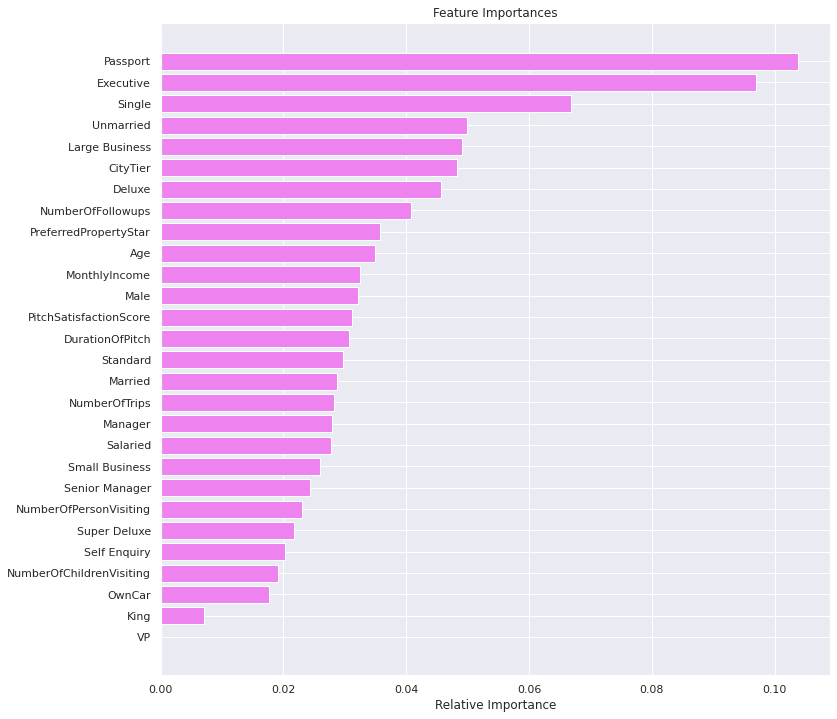

In [63]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


- In XGBoost, recall and F1 metric are performing poorly. The top 5 features are completely different from other models 


## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [64]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [65]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=12,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
               

In [66]:
stacking_estimator_score=get_model_score(stacking_estimator)

Accuracy on train data: 1.0
Accuracy on test data: 0.930589184826473
Recall on train data: 1.0
Recall on test data: 0.7615062761506276
Precision on train data: 1.0
Precision on test data: 0.8625592417061612
f1 score on train data: 1.0
f1 score on test data: 0.8088888888888888


- Stacking Classifer score highly on Recall and F1 scores

## Comparing all models

In [67]:

# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_classifier, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
Accuracy_train = []
Accuracy_test = []
Recall_train= []
Recall_test= []
Precision_train = []
Precision_test = []
f1_score_train= []
f1_score_test= []


# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    Accuracy_train.append(j[0])
    Accuracy_test.append(j[1])
    Recall_train.append(j[2])
    Recall_test.append(j[3])
    Precision_train.append(j[4])
    Precision_test.append(j[5])
    f1_score_train.append(j[6])
    f1_score_test.append(j[7])



In [68]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Classifier', 'Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Accuracy_train':Accuracy_train,'Accuracy_test': Accuracy_test,
                                          'Recall_train':Recall_train,'Recall_test':Recall_test,
                                          'Precision_train':Precision_train,'Precision_test':Precision_test,
                                          'f1_score_train':f1_score_train,'f1_score_test':f1_score_test}) 
comparison_frame

,Model,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,f1_score_train,f1_score_test
0,Decision Tree,1.000000,0.900726,1.000000,0.723849,1.000000,0.752174,1.000000,0.737740
1,Tuned Decision Tree,0.978539,0.887006,0.894265,0.648536,0.994024,0.734597,0.941509,0.688889
2,Random Forest,1.000000,0.913640,1.000000,0.615063,1.000000,0.907407,1.000000,0.733167
3,Tuned Random Forest,1.000000,0.922518,1.000000,0.707113,1.000000,0.866667,1.000000,0.778802
4,AdaBoost Classifier,0.849775,0.822437,0.394265,0.317992,0.696203,0.571429,0.503432,0.408602
5,Tuned AdaBoost Classifier,0.858429,0.828894,0.372760,0.280335,0.779026,0.626168,0.504242,0.387283
6,Gradient Boosting Classifier,0.901696,0.858757,0.560932,0.422594,0.889205,0.731884,0.687912,0.535809
7,Tuned Gradient Boosting Classifier,1.000000,0.929782,1.000000,0.723849,1.000000,0.891753,1.000000,0.799076
8,XGBoost Classifier,0.895812,0.857950,0.530466,0.410042,0.883582,0.736842,0.662934,0.526882
9,Tuned XGBoost Classifier,0.909311,0.868442,0.593190,0.443515,0.904372,0.779412,0.716450,0.565333


- Tuned random forest model, Tuned Gradient Boosting and Stacking classifers are the best models here. They have highest Recall and F1 scores
- Other boosting classifiers like AdaBoost and XGboost classifers perfomred poorly on this dataset

## Concusions

- Overall we can see that the Tuned Decision tree And Random Forest models  performs better on a given dataset
- For Decision tree And Random Forest models, Feature importance also matches. The top 5 features include Age, Duration of Pitch, Monthly Income, Executive position and holding Passport are inmportant features that has a positive predictive relation with a customer taking the travel package


## <a id = "link8"></a> Business Recommendations

- We can use this predictive model with top5 important features viz. Age, Duration of Pitch, Monthly Income, Executive position and holding Passport to predict if the customer will select a travel package. 
- Bagging classifier have perfomred better than boosting classifiers
- The demographic age of 30-45 that are in executivepostions and holding passports can be the focus customerbase. This group will nned to be given a effective pitch 
- Self Inquiry is much higher than Company Invited. Needs to be investigated for better marketing strategy.
- ML model with more data to predict the perfect time to make the pitch will help ur reach customers before they reach us. 
-Couples and families are large demographic. Targetted advertisement to this group will help. 
- Deluxe and Basic packages are popular packages. We can investigate these further to know what makkes them popular to offer packages in future.